# Punktladninger

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0


e0 = 8.854 * 10**(-12)            #  F/m

In [19]:
def E_force(Q1, Q2, R):
    weight =  Q1*Q2/(4*np.pi*e0* np.linalg.norm(R)**2)
    decomposition = R/np.linalg.norm(R)
    print("The electric force on particle 2:")
    print(weight, decomposition)
    return weight*decomposition

R = np.array([2,-1])

E_force(4e-9,-6e-9, R)

The electric force on particle 2:
-4.314116370234344e-08 [ 0.89442719 -0.4472136 ]


array([-3.85866299e-08,  1.92933149e-08])

# Visualisering av elektriske felt 

/home/oline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


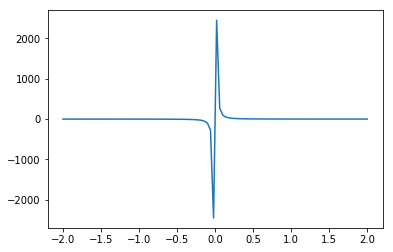

In [81]:
r_vec = np.linspace(-2,2,1e2)
E = np.zeros(r.shape)

def e_field(r, r0, Q):
    dr = r-r0
    rnorm = np.sqrt(dr.dot(dr))
    return Q*dr/rnorm**3

r0 = np.array([0])
for i in range(len(r_vec)):
    E[i] = e_field(r_vec[i], r0, 1)

plt.plot(r_vec,E)

## The electric field lines

/home/oline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


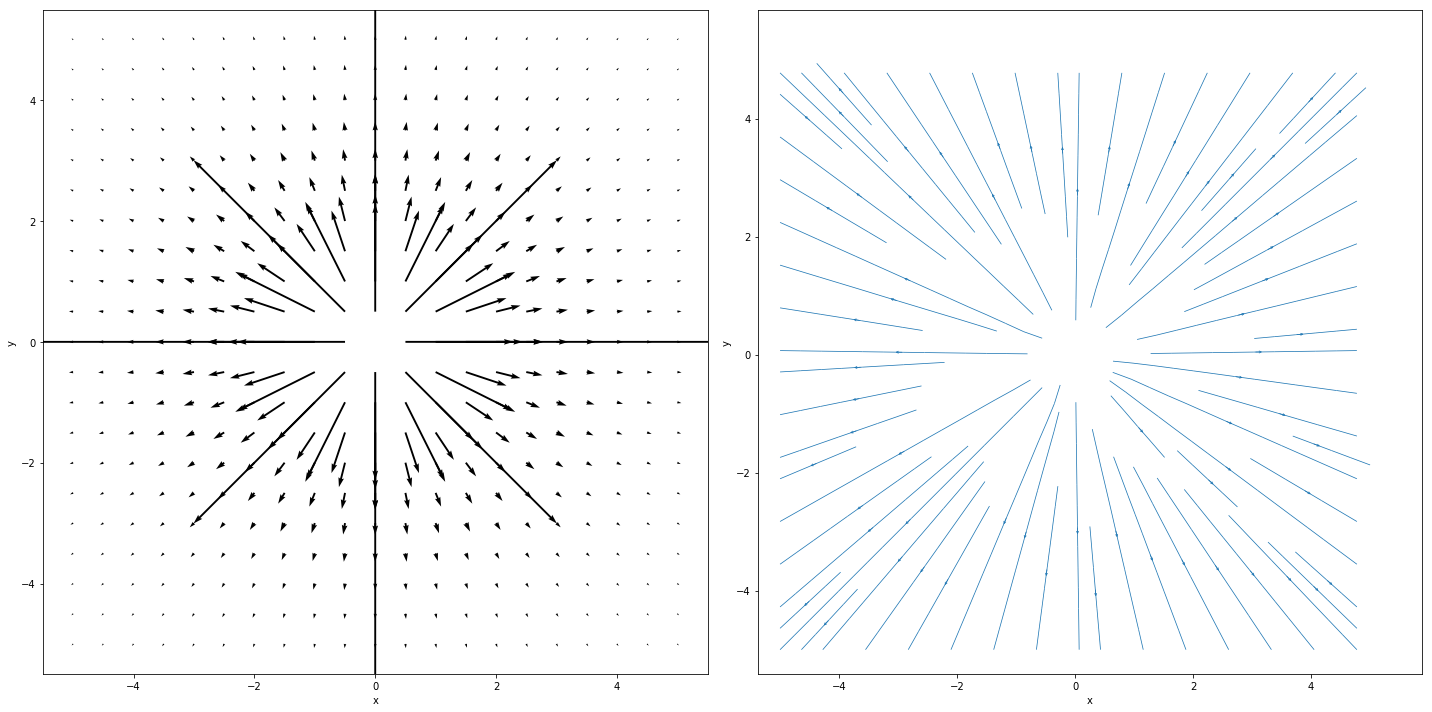

In [83]:
x = np.linspace(-5,5,21)
y = np.linspace(-5,5,21)
X,Y = np.meshgrid(x,y)
Ex = X.copy()
Ex[:] = 0
Ey = Y.copy()
Ey[:] = 0
Q = 1.0
R0 = np.array([0, 0])
for i in range(len(X.flat)):
    R = np.array([X.flat[i], Y.flat[i]])
    Ex.flat[i], Ey.flat[i] = e_field(R, R0, Q)
    
    
plt.figure(figsize = (20,10)) 
ax1 = plt.subplot(121)
ax1.quiver(X,Y,Ex,Ey)
ax1.axis('equal')
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2=plt.subplot(122)
ax2.streamplot(x,y, Ex, Ey,linewidth=0.75,density=1,arrowstyle='->',arrowsize=0.5)
ax2.axis('equal')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.tight_layout()

In [87]:
def e_field_dipole(r, r0_1, r0_2, Q1, Q2):
    dr_1 = r-r0_1
    dr_2 = r-r0_2
    rnorm_1 = np.sqrt(dr_1.dot(dr_1))
    rnorm_2 = np.sqrt(dr_2.dot(dr_2))
    return Q1*dr_1/rnorm_1**3 + Q2*dr_2/rnorm_2**3

/home/oline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


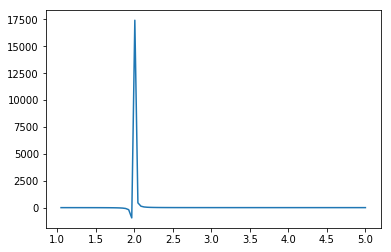

In [91]:
r_vec = np.linspace(1.05,5,1e2)
E = np.zeros(r.shape)

r0 = np.array([2])
a = np.array([2])
for i in range(len(r_vec)):
    E[i] = e_field_dipole(r_vec[i], a, -a, 1,-1)

plt.plot(r_vec,E)

# Dipol og gradient


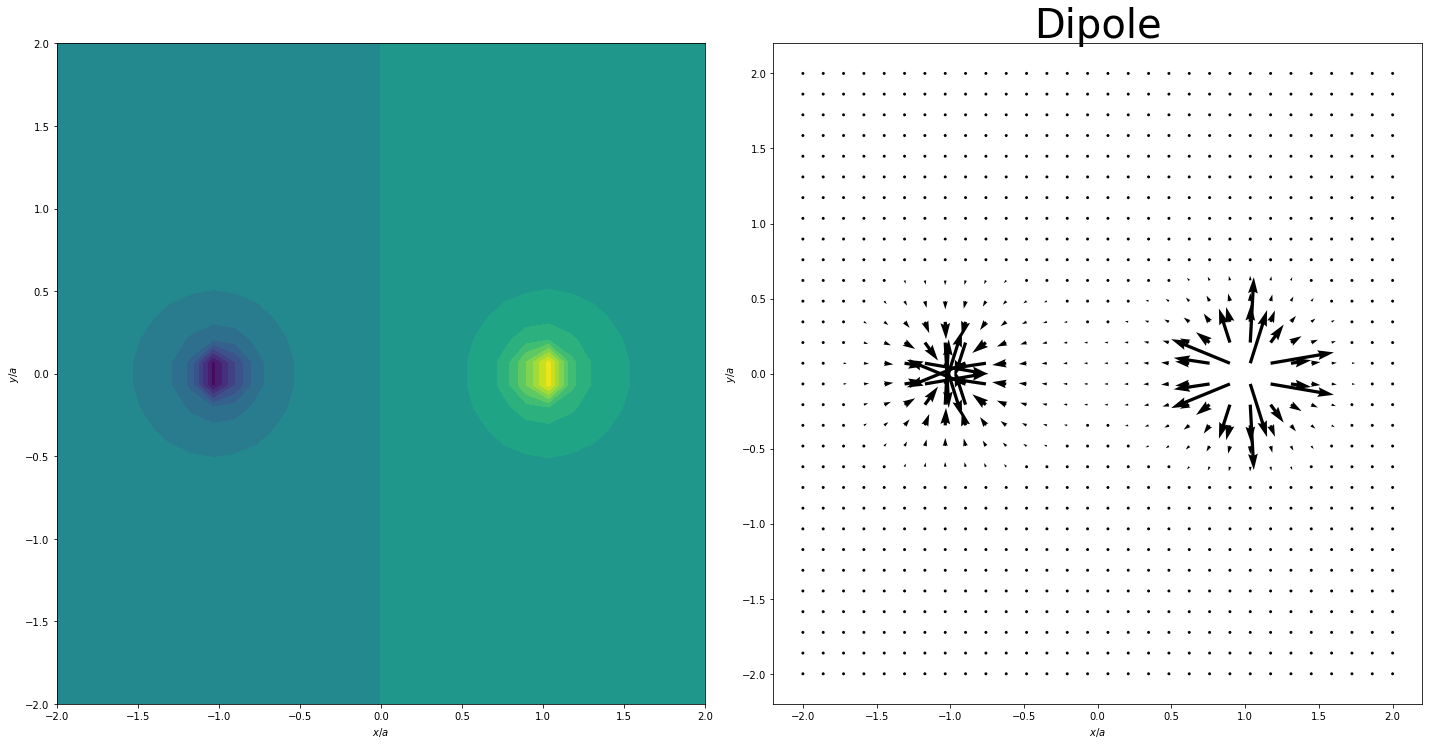

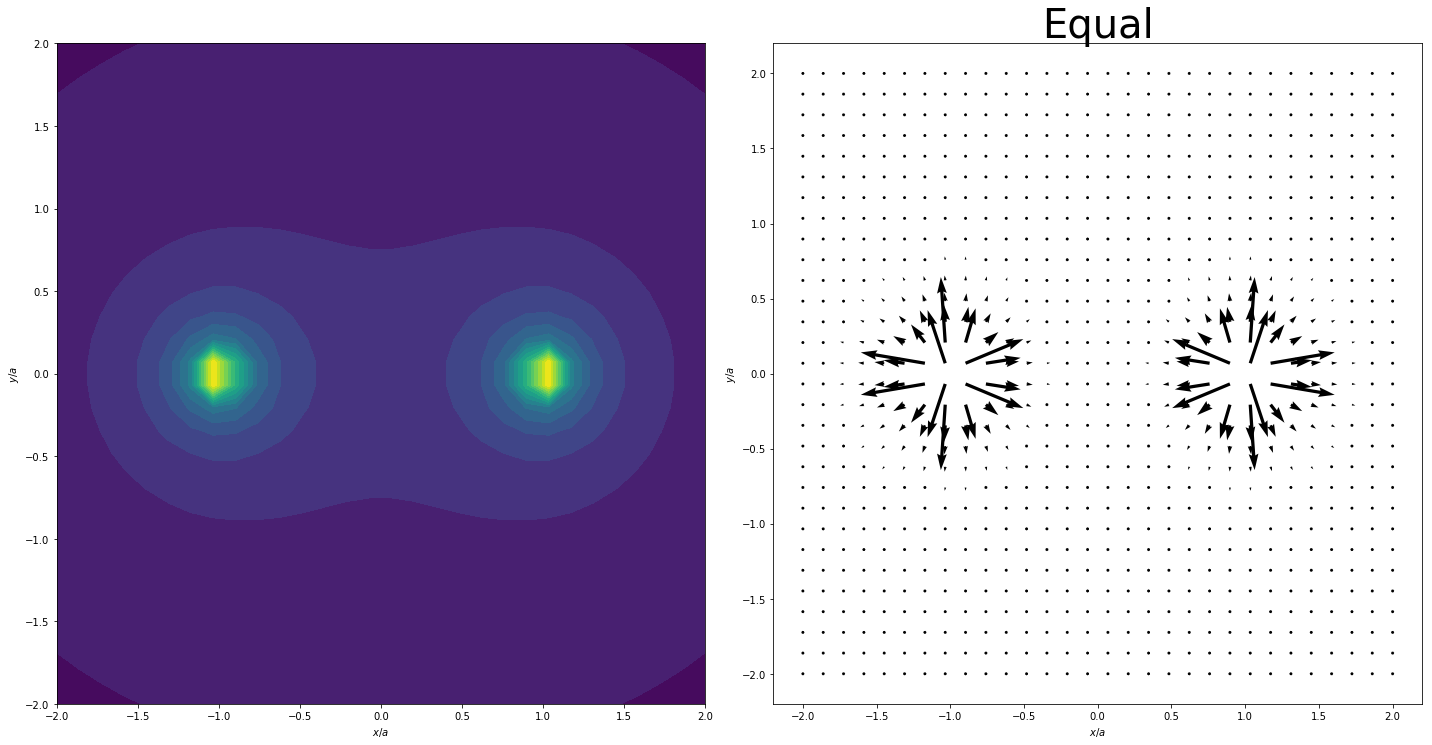

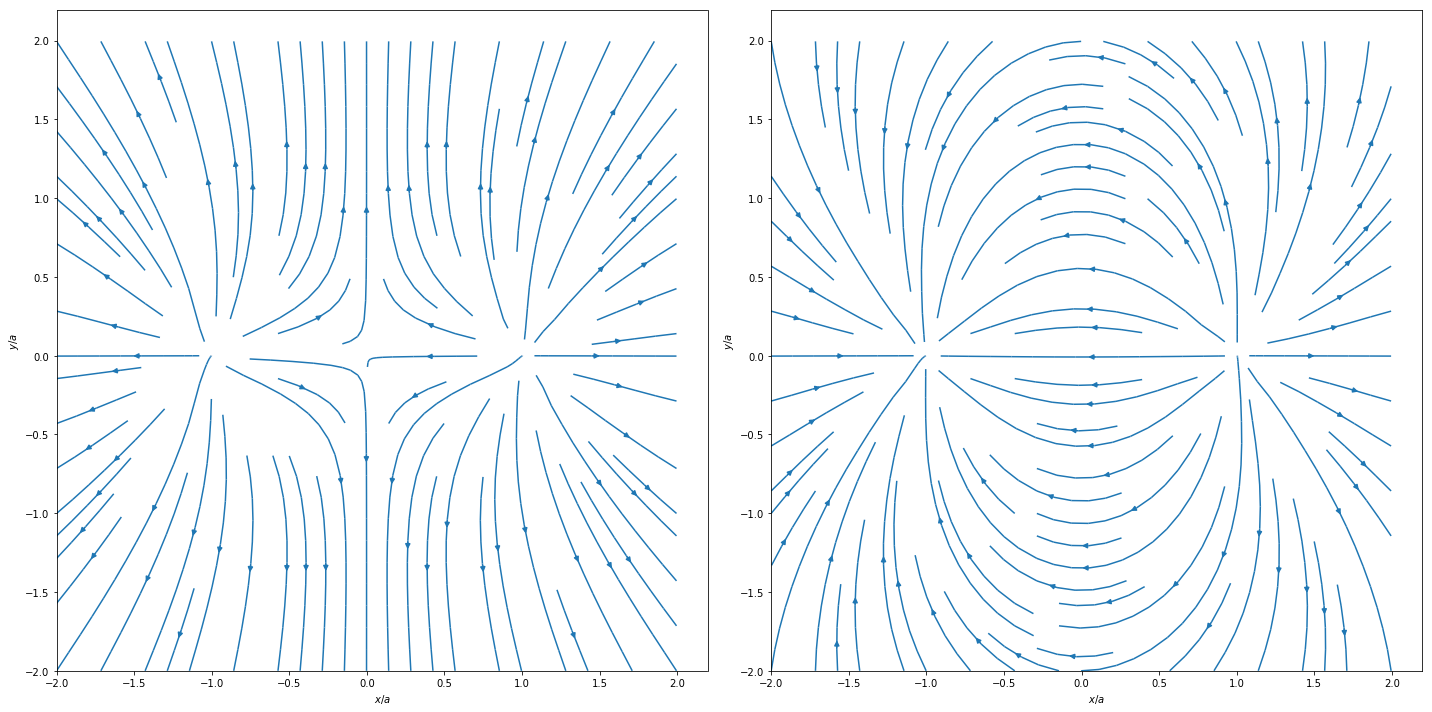

In [119]:
a = 1
R_q1 = np.array([a,0,0])
R_q2 = np.array([-a,0,0])

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)

def electric_potential_dipole(Q1,Q2,x,y,a):
    return Q1/np.sqrt((x-a)**2+y**2) - Q2/np.sqrt((x+a)**2+y**2)

def electric_potential_positive(Q1,Q2,x, y,a): 
    return Q1/np.sqrt((x-a)**2+y**2) + Q2/np.sqrt((x+a)**2+y**2)


plt.figure(figsize = (20,10))
Varr = electric_potential_dipole(1,1,X, Y, a)

plt.subplot(121)
plt.contourf(X, Y, Varr, 20)
plt.xlabel("$x/a$")
plt.ylabel("$y/a$")
plt.subplot(122)
Ey, Ex = np.gradient(-Varr)
plt.quiver(X, Y, Ex, Ey, scale=50, width=0.005)
plt.xlabel("$x/a$")
plt.ylabel("$y/a$")
plt.tight_layout()
plt.title('Dipole', fontsize = 40)


plt.figure(figsize = (20,10))
Varr = electric_potential_positive(1,1,X, Y,a)
plt.subplot(121)
plt.contourf(X, Y, Varr, 20)
plt.xlabel("$x/a$")
plt.ylabel("$y/a$")
plt.subplot(122)
Ey, Ex = np.gradient(-Varr)
plt.quiver(X, Y, Ex, Ey, scale=50, width=0.005)
plt.xlabel("$x/a$")
plt.ylabel("$y/a$")
plt.tight_layout()
plt.title('Equal', fontsize = 40)

# Strømlinjeplott
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.streamplot(X, Y, *np.gradient(-V_dobbel_positiv(X, Y))[::-1])
plt.xlabel("$x/a$")
plt.ylabel("$y/a$")
plt.subplot(122)
plt.streamplot(X, Y, *np.gradient(-V_dipol(X, Y))[::-1])
plt.xlabel("$x/a$")
plt.ylabel("$y/a$")
plt.tight_layout()
